In [1]:
import pandas as pd
import sqlite3
import time
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from snownlp import SnowNLP

mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

conn = sqlite3.connect('../sqlite3/qq.db')
cur = conn.cursor()

cur.execute('select * from groupInfo')
groups = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from member')
members = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from message')
messages = pd.DataFrame(list(cur.fetchall()))

情感分析

In [2]:
sentiments = []
def handle(matched):
    return ''
for message in messages.values:
    text = re.sub('\[CQ.*?]', handle, message[5]).strip()
    if len(text) == 0:
        sentiments.append(0)
        continue

    s = SnowNLP(message[5])
    sentiment = 0
    for sentence in s.sentences:
        sentiment += SnowNLP(sentence).sentiments
    if len(s.sentences):
        sentiment /= len(s.sentences)
    sentiments.append(sentiment)

messages['sentiment'] = sentiments
messages.sort_values(by='sentiment')

,0,1,2,3,4,5,6,sentiment
15628,-1107893343,383860,850068109,3105957389,0,"[CQ:image,file=2308f1f1c41a4c4fdc63901a05f020a...",1671368798,0.000000
23180,1204505140,1355646,45855966,347296653,0,"[CQ:image,file=bb44b20eca7be372dcc0b62ffbb9e0f...",1671458273,0.000000
28174,-183848987,282179,479768314,2441208213,0,"[CQ:image,file=f3caba086b4ac091e66650180e42d96...",1671519949,0.000000
15181,-1979379014,383515,850068109,2983868301,0,？,1671367828,0.000000
15183,-1327270181,382323,751072608,2137117286,0,"[CQ:image,file=4ee371343b5c6f183ae8500f410c88a...",1671367831,0.000000
...,...,...,...,...,...,...,...,...
16960,1402884357,280271,479768314,1667412136,0,"[CQ:reply,id=-1545157263][CQ:at,qq=1102311627]...",1671424142,0.999975
2377,-1430586403,1342388,45855966,2458982328,0,让开发者坦诚面对心中对玩家金币的无限渴望,1670816871,0.999988
27403,1584786319,118799,916462960,781432345,0,"[CQ:reply,id=-674117793][CQ:at,qq=2517045961] ...",1671513231,0.999994
16966,1425249564,280275,479768314,1667412136,0,救命哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈,1671424167,0.999999


全局分布

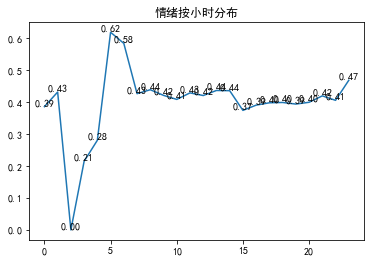

In [3]:
x = range(24)
y = [0] * 24
count = [0] * 24
for message in messages.values:
    y[time.localtime(message[6]).tm_hour] += message[7]
    count[time.localtime(message[6]).tm_hour] += 1
for i in range(24):
    if count[i] != 0:
        y[i] /= count[i]
plt.plot(x, y)
plt.title(f'情绪按小时分布')
for a, b in zip(x, y):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom')
plt.show()

单群分布

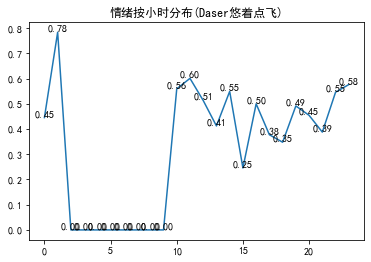

In [4]:
GROUPID = 745864592
groupInfo = groups.loc[groups[0] == GROUPID]
groupMessage = messages.loc[messages[2] == GROUPID]
groupMember = members.loc[members[0] == GROUPID]

x = range(24)
y = [0] * 24
count = [0] * 24
for message in groupMessage.values:
    y[time.localtime(message[6]).tm_hour] += message[7]
    count[time.localtime(message[6]).tm_hour] += 1
for i in range(24):
    if count[i] != 0:
        y[i] /= count[i]
plt.plot(x, y)
plt.title(f'情绪按小时分布({groupInfo.iloc[0, 1]})')
for a, b in zip(x, y):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom')
plt.show()

用户分布

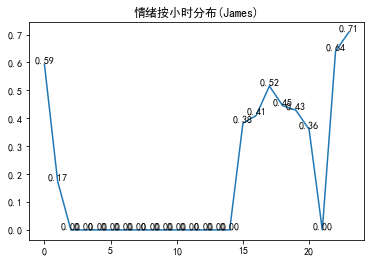

In [6]:
USERID = 2629557192
userInfo = members.loc[members[1] == USERID]
userMessage = messages.loc[messages[3] == USERID]

x = range(24)
y = [0] * 24
count = [0] * 24
for message in userMessage.values:
    y[time.localtime(message[6]).tm_hour] += message[7]
    count[time.localtime(message[6]).tm_hour] += 1
for i in range(24):
    if count[i] != 0:
        y[i] /= count[i]
plt.plot(x, y)
plt.title(f'情绪按小时分布({userInfo.iloc[0, 2]})')
for a, b in zip(x, y):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom')
plt.show()